In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
from matlab_functions import *

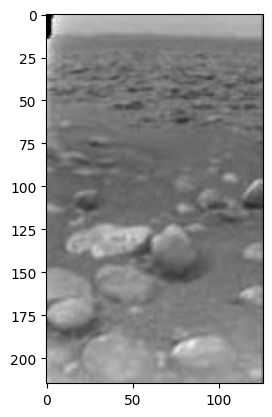

In [4]:


titan = Image.open("titan.jpg")
titan_array = np.array(titan).astype(np.double)
tmax = titan_array.max()
tmin = titan_array.min()
titan_array = titan_array / tmax
titan_array.shape

plt.imshow(titan_array, cmap="gray")
plt.rcParams['figure.figsize'] = [20, 15]
plt.rcParams['figure.dpi'] = 100
plt.show()

titan_1d = titan_array.flatten()

In [5]:
# add X and Y coordinate values
xmax = titan_array.shape[0]
ymax = titan_array.shape[1]
size = 60
spread_x = np.linspace(0, xmax, xmax)
spread_y = np.linspace(0, ymax, ymax)
X, Y = np.meshgrid(spread_x, spread_y)
X_cov = X.flatten()
Y_cov = Y.flatten()



covariates = np.vstack((np.ones((X_cov.shape[0])), X_cov, Y_cov)).T

print(covariates.shape)

tindex = np.arange(0, titan_array.shape[0]*titan_array.shape[1])
tp = 0.5
tindex_o = np.random.choice(tindex, size=round(tindex.shape[0]*tp), replace=False)
# Could do smarter sampling above, i.e. instead shuffle tindex as: np.random.shuffle(tindex)
# and then take the first round(tindex.shape[0]*tp) elements
# but setdiff1d seems like a good function to know about.
tindex_m = np.setdiff1d(tindex, tindex_o)

titan_array_o = titan_1d[tindex_o]
titan_array_m = titan_1d[tindex_m]


# dist matrix and stuff for variogram estimation
loc = np.column_stack((X_cov, Y_cov))

D = squareform(pdist(loc))

loc_o = loc[tindex_o, :]
loc_m = loc[tindex_m, :]

# estimate parameters LSE then GLS

lse = np.linalg.solve(covariates[tindex_o, :].T @ covariates[tindex_o, :], covariates[tindex_o, :].T @ titan_array_o)
e = titan_array_o - covariates[tindex_o, :] @ lse

h = np.linspace(0, np.sqrt(xmax**2 + ymax**2), 100)
emp_v = emp_variogram(loc_o, e, 60)

lse_estimates = cov_ls_est(e, 'matern' , emp_v) #Least-squares estimation of a Mat rn variogram to the binned estimate

mat_v_new = matern_variogram(h,lse_estimates["sigma"],lse_estimates["kappa"],lse_estimates["nu"],lse_estimates["sigma_e"])



(27090, 3)
hej


: 

: 

In [ ]:
# Covariance matrix
S = matern_covariance(D, lse_estimates["sigma"], lse_estimates["kappa"], lse_estimates["nu"])

In [ ]:

gls = np.linalg.solve(Bo.T @ np.linalg.solve(So, Bo), Bo.T @ np.linalg.solve(So, Observed_values))